## Data Loading

In [ ]:
## Imports  and data loading
import pandas as pd
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## Preprocessing the data
We convert the string object columns to integer category types to be able to feed into our model.

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,0,25,10,45,10,2,0,1,1,4,...,2,1,1,1,2,1,0,2,0,160
1,1,32,16,45,11,2,0,0,2,5,...,0,0,1,0,0,1,1,0,0,160
2,2,20,20,7,45,2,0,0,2,4,...,1,1,1,2,2,2,2,1,0,160
3,3,19,20,44,45,2,1,1,1,2,...,1,2,2,1,0,0,0,1,1,160
4,4,19,20,45,37,2,0,0,0,1,...,0,1,1,1,2,2,2,0,0,160


<Axes: >

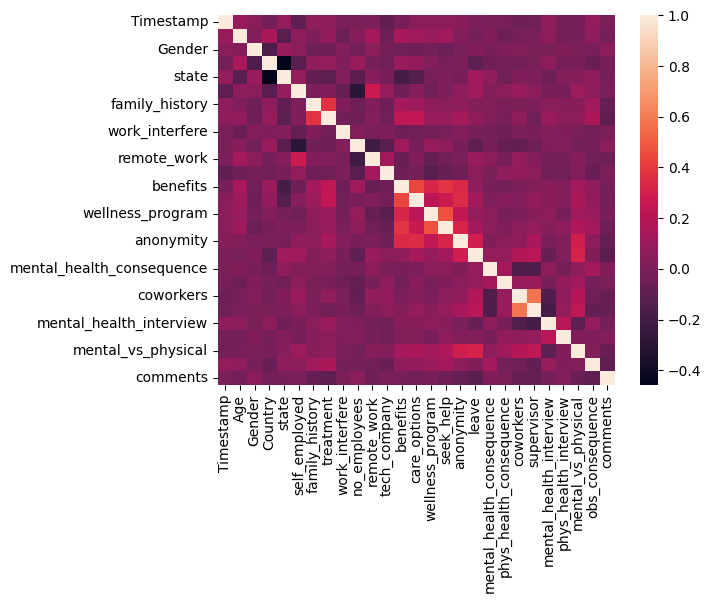

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr())

## Kmeans Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df)

In [ ]:
df['cluster']=kmeans.labels_
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,cluster
0,0,25,10,45,10,2,0,1,1,4,...,1,1,1,2,1,0,2,0,160,1
1,1,32,16,45,11,2,0,0,2,5,...,0,1,0,0,1,1,0,0,160,1
2,2,20,20,7,45,2,0,0,2,4,...,1,1,2,2,2,2,1,0,160,1
3,3,19,20,44,45,2,1,1,1,2,...,2,2,1,0,0,0,1,1,160,1
4,4,19,20,45,37,2,0,0,0,1,...,1,1,1,2,2,2,0,0,160,1


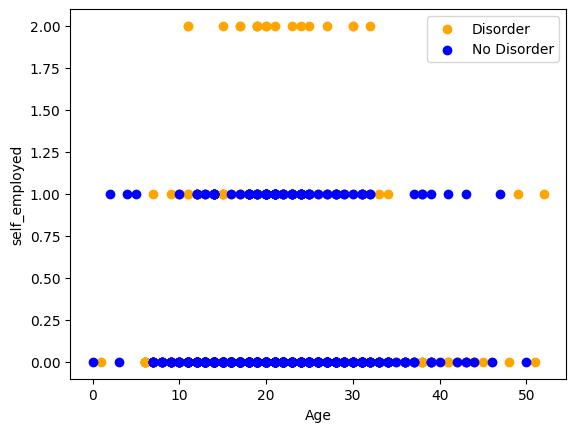

In [ ]:
plt.scatter(df['Age'][df['cluster']==1],df['self_employed'][df['cluster']==1],c='orange', label='Disorder'),
plt.scatter(df['Age'][df['cluster']==0],df['self_employed'][df['cluster']==0],c='blue', label='No Disorder'),
plt.legend()
plt.xlabel('Age')
plt.ylabel('self_employed')
plt.show()